### Exploratory Data Analysis of "Airplane Crashes and Fatalities" dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('dark_background')

#### Data Preparation

Data from: https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023

In [3]:
data= pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1', parse_dates=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [5]:
data.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [6]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [7]:
data= data.set_index('Date')

data= data.rename(columns={
    'Flight #':'Flight #',
    'AC Type':'ACtype',
    'Aboard Passangers':'Aboard_Passangers',
    'Aboard Crew':'Aboard_Crew',
    'Fatalities Passangers':'Fatalities_Passangers',
    'Fatalities Crew':'Fatalities_Crew',
})

data.index=pd.to_datetime(data.index)

#### Exploratory Data Analysis

##### Deaths per day

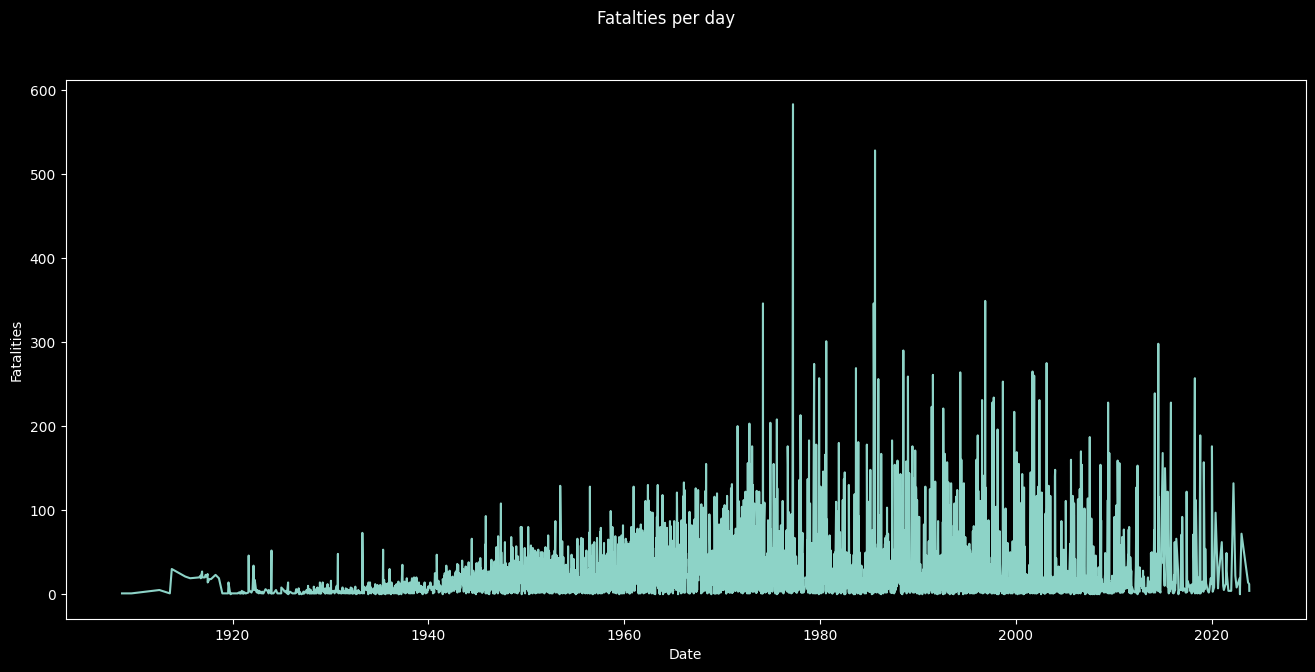

In [8]:
deaths_per_day=data.groupby('Date').Fatalities.sum()
plt.figure(figsize=(16,7))
sns.lineplot(deaths_per_day)
plt.suptitle('Fatalties per day')
plt.show()

##### Top 2 flights with the most amount of people aboard

In [9]:
data=data.sort_values(by='Fatalities', ascending=False)
data.iloc[:2,:]

,Time,Location,Operator,Flight #,Route,ACtype,Registration,cn/ln,Aboard,Aboard_Passangers,Aboard_Crew,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Summary
Date,,,,,,,,,,,,,,,,
1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,614.0,30.0,583.0,560.0,23.0,0.0,Both aircraft were diverted to Tenerife becaus...
1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,509.0,15.0,520.0,505.0,15.0,0.0,The aircraft suffered an aft pressure bulkhead...


In [10]:
surv1= int(data['Aboard'].iloc[0] - data['Fatalities'].iloc[0])
surv2= int(data['Aboard'].iloc[1] - data['Fatalities'].iloc[1])
ratio1= 1 - (data['Fatalities'].iloc[0]/data['Aboard'].iloc[0])
ratio2= 1 - (data['Fatalities'].iloc[1]/data['Aboard'].iloc[1])
print("------------ Flight 1 ------------")
print("Survivors: {}\nProportion: {}".format(surv1, round(ratio1, 4)))
print("------------ Flight 2 ------------")
print("Survivors: {}\nProportion: {}".format(surv2, round(ratio2, 4)))

------------ Flight 1 ------------
Survivors: 61
Proportion: 0.0947
------------ Flight 2 ------------
Survivors: 4
Proportion: 0.0076


##### Deaths per Month

In [11]:
#Splitting deaths by month
monthly_deaths=[[],[],[],[],[],[],[],[],[],[],[],[]]
date=deaths_per_day.index
for i in range(len(deaths_per_day)):
    monthly_deaths[date[i].month - 1].append(deaths_per_day.iloc[i])

#Sum of each month
deaths_per_month=np.zeros(12, dtype=int)
for i in range(12):
    deaths_per_month[i]=int(sum(monthly_deaths[i]))

#Ratio
total_fatalites=sum(deaths_per_month)
monthly_ratio=np.round((deaths_per_month/total_fatalites)*100, 2)

#Creating Dataframe
month_index= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df=pd.DataFrame({'Deaths':deaths_per_month, 'Percentage': monthly_ratio} ,index=month_index)
df

,Deaths,Percentage
Jan,9026,8.08
Feb,8190,7.34
Mar,9521,8.53
Apr,7291,6.53
May,7958,7.13
Jun,8466,7.58
Jul,10479,9.39
Aug,10317,9.24
Sep,10597,9.49
Oct,8435,7.56


##### Survivors per month

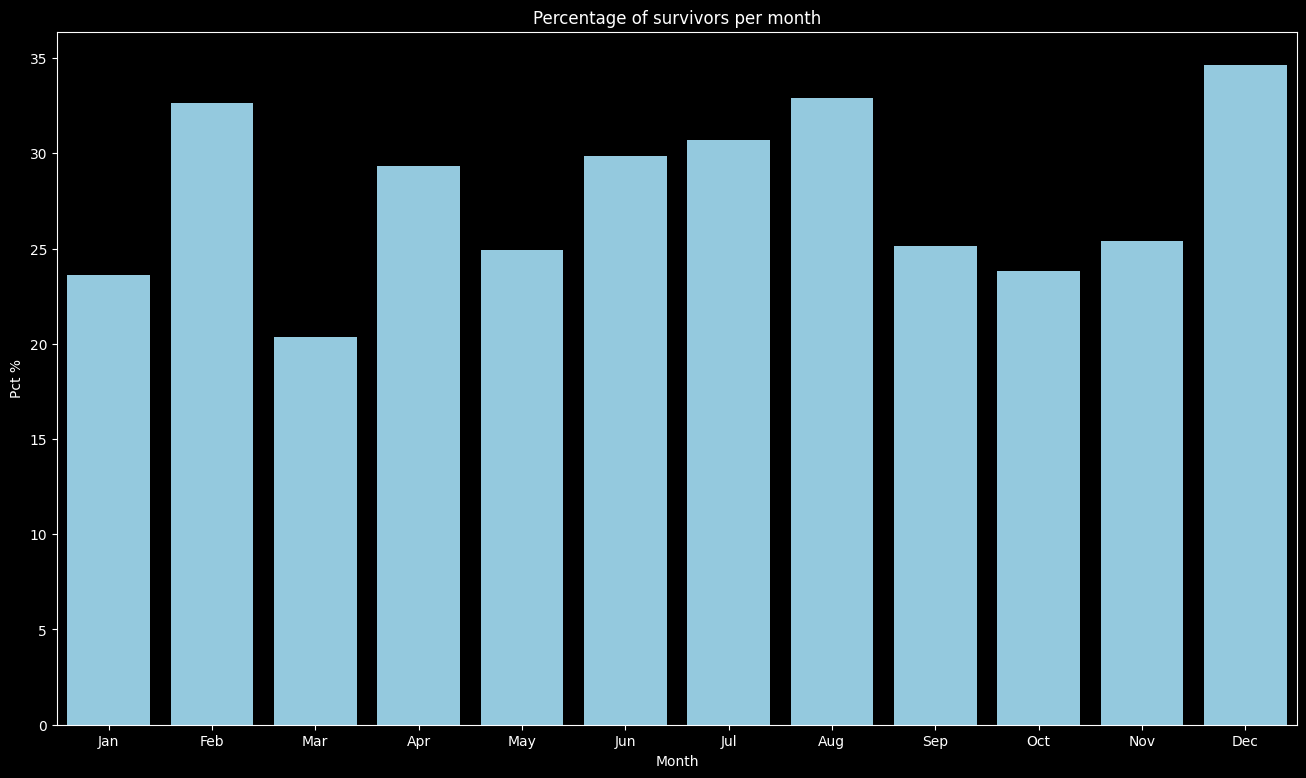

In [12]:
aboard_per_day=data.groupby('Date').Aboard.sum()

#Splitting per month (people aboard)
monthly_ab=[[],[],[],[],[],[],[],[],[],[],[],[]]
date= aboard_per_day.index
for i in range(len(deaths_per_day)):
    monthly_ab[date[i].month - 1].append(aboard_per_day.iloc[i])

#Sum of each month
aboard_per_month=np.zeros(12, dtype=int)
for i in range(12):
    aboard_per_month[i]=int(sum(monthly_ab[i]))

#Ratio
sob=aboard_per_month-deaths_per_month
pct_sob=np.round((sob/aboard_per_month)*100, 2)

#Bar Graph
plt.figure(figsize=(16,9))
sns.barplot(x=month_index, y=pct_sob, color='skyblue')

plt.title("Percentage of survivors per month")
plt.xlabel("Month")
plt.ylabel("Pct %")
plt.show()